#### Import the necesary libraries

In [1]:
import pandas as pd
import calendar
import seaborn as sns
from matplotlib import pyplot as plt

print('Libraries have been imported !')

Libraries have been imported !


#### Open the excel file and open the sheet named:  '6. Precio OIC Mensual'
#### Delete the first 5 Rows and rename the Columns

In [2]:
url = 'https://federaciondecafeteros.org/app/uploads/2020/01/Precios-%C3%A1rea-y-producci%C3%B3n-de-caf%C3%A9.xlsx'
# name of the file
#file = pd.ExcelFile('coffee prices.xlsx')

# name of the sheet '6. Precio OIC Mensual'
df = pd.read_excel(url, sheet_name = '6. Precio OIC Mensual')
# df = pd.read_excel(file, sheet_name = '6. Precio OIC Mensual')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,Precios indicativos OIC por grupos - Promedio ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Centavos de dólar por libra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Fuente: ICO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Suaves colombianos (arábigo),NaN,NaN,Otros suaves (arábigo),NaN,NaN,Naturales del Brasil (arábigo),NaN,NaN,Robustas,NaN,NaN,NaN


In [3]:
# removes the first column as it doesn't have any data
df = df.drop(df.columns[[0,-1]], axis = 1)

# remove the first 5 columns as is part of the format in the excel file
df = df.drop(index = df.index[0:6],
       axis = 0)

In [4]:
# renames the column for an easier comprenhesion 
df = df.rename(columns = {'Unnamed: 1': 'Date', 'Unnamed: 2':'OIC_price',
                          'Unnamed: 3':'Colombia_ny', 'Unnamed: 4':'Colombia_europe', 'Unnamed: 5':'Colombia_average',
                          'Unnamed: 6':'Other_ny', 'Unnamed: 7':'Other_europe','Unnamed: 8':'Other_average',
                          'Unnamed: 9':'Brazil_ny', 'Unnamed: 10':'Brazil_europe', 'Unnamed: 11':'Brazil_average',
                          'Unnamed: 12':'Robustas_ny', 'Unnamed: 13':'Robustas_europe','Unnamed: 14':'Robustas_average'})
df.head()

,Date,OIC_price,Colombia_ny,Colombia_europe,Colombia_average,Other_ny,Other_europe,Other_average,Brazil_ny,Brazil_europe,Brazil_average,Robustas_ny,Robustas_europe,Robustas_average
6,2000-01-01 00:00:00,82.15,130.12,124.36,130.13,109.17,116.82,111.11,97.67,103.1,97.68,53.62,52.41,53.18
7,2000-02-01 00:00:00,76.15,124.72,118.67,124.73,101.17,110.19,103.44,91.51,96.58,91.51,49.41,47.97,48.85
8,2000-03-01 00:00:00,73.49,119.51,115.78,119.51,98.26,108.13,100.73,89.93,94.78,89.93,47.26,44.73,46.25
9,2000-04-01 00:00:00,69.53,112.67,109.12,112.67,92.41,101.51,94.61,86.46,90.7,86.46,45.21,43.31,44.45
10,2000-05-01 00:00:00,69.22,110.31,107.85,110.31,91.76,100.99,94.17,87.23,91.01,87.23,45.19,43.01,44.32


## Exploratory Data Analysis

#### Checking how many NA's are there in the dataset, what type of each column is, how many columns we have and in general all the information from the data 

In [5]:
# exploring the data types and if there are NA's
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 6 to 277
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              272 non-null    object
 1   OIC_price         272 non-null    object
 2   Colombia_ny       272 non-null    object
 3   Colombia_europe   272 non-null    object
 4   Colombia_average  272 non-null    object
 5   Other_ny          272 non-null    object
 6   Other_europe      272 non-null    object
 7   Other_average     272 non-null    object
 8   Brazil_ny         272 non-null    object
 9   Brazil_europe     272 non-null    object
 10  Brazil_average    272 non-null    object
 11  Robustas_ny       272 non-null    object
 12  Robustas_europe   272 non-null    object
 13  Robustas_average  272 non-null    object
dtypes: object(14)
memory usage: 29.9+ KB


#### The types of the columns are object, Changing them for numeric type float, so we can see the statistics

In [6]:
# changes the format of the column 'Date' for just the year and the month
df['Date'] = pd.to_datetime(df['Date']).dt.to_period('M')

# creates a list with the names of the columns, removes the first item 'Date, changes the type to float
lista = list(df.columns)
lista.pop(0)
for item in lista:
    df[item] = df[item].astype(float)
    
# check that the changes have been donde
df.describe()

,OIC_price,Colombia_ny,Colombia_europe,Colombia_average,Other_ny,Other_europe,Other_average,Brazil_ny,Brazil_europe,Brazil_average,Robustas_ny,Robustas_europe,Robustas_average
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,113.633237,153.333888,148.409523,151.222932,145.099616,143.098234,143.966330,118.365112,123.408718,121.959193,79.670588,74.456376,75.376692
std,43.687941,62.437782,59.732402,61.156478,58.414410,55.916915,56.927377,49.732689,51.170812,50.984818,28.448193,26.567300,26.767165
min,41.170000,58.920000,57.720000,58.100000,51.950000,55.760000,54.280000,37.670000,38.710000,38.630000,21.250000,22.790000,22.810000
25%,88.547500,112.940000,111.697500,112.670000,108.720000,110.295000,109.712500,94.405000,96.056883,95.605714,57.895000,54.765000,55.347500
50%,113.155682,144.413636,141.123636,143.529552,141.896818,138.104348,140.704773,111.980000,117.983409,116.833333,84.680554,78.150682,79.203636
75%,133.130252,182.577237,178.760455,179.022500,169.232857,165.942045,166.686126,132.726023,143.199599,140.728880,103.530147,97.329432,98.367841
max,231.240000,319.633750,311.450000,312.950000,303.590000,297.220000,300.120000,271.390000,273.430000,273.400000,126.300000,121.300000,121.980000


#### Doing a box plot for each of the columns

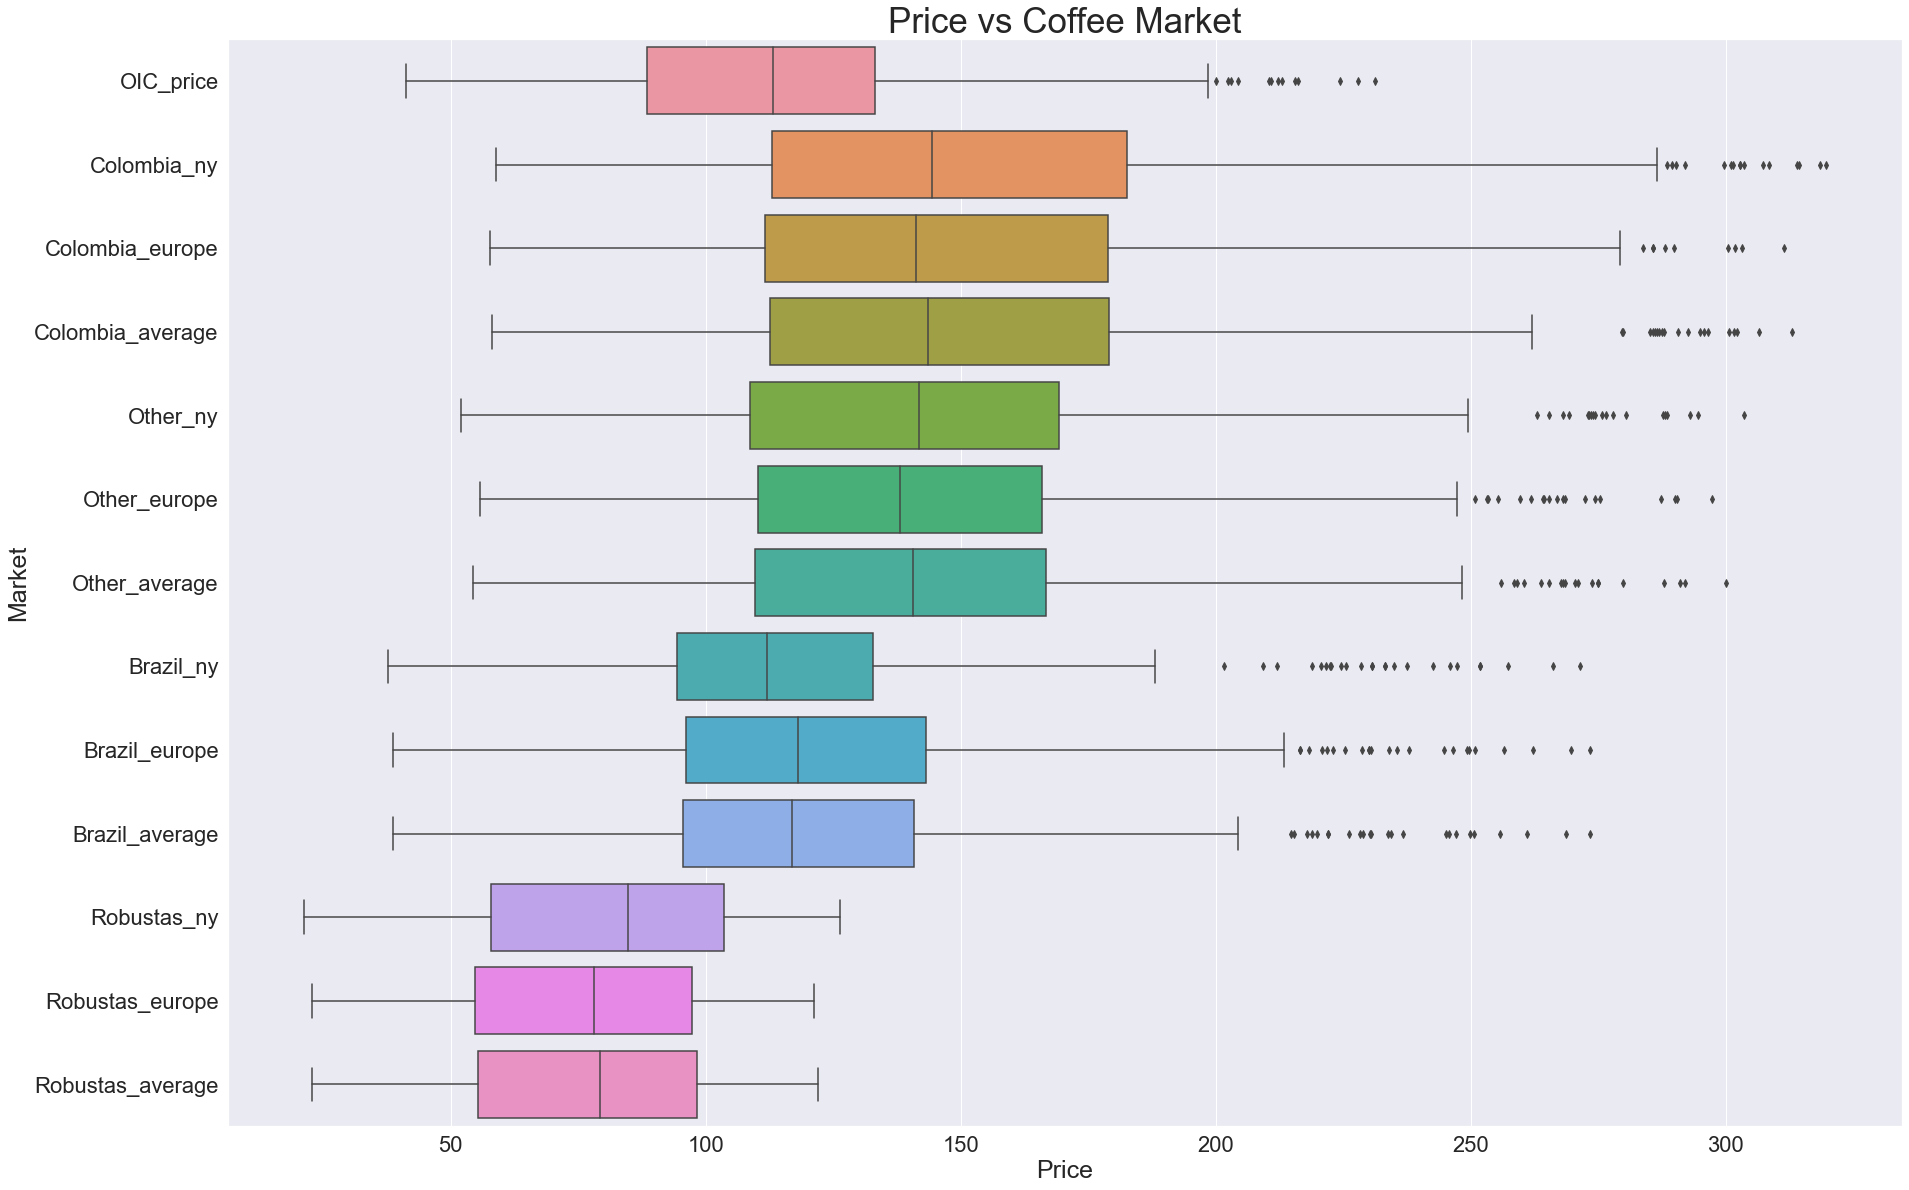

In [7]:
# incresesthe size of the graph
plt.figure(figsize=(30,20))

# increases the size of the font
sns.set(font_scale=2)

# sets the data and the orientation
s = sns.boxplot(data = df, orient = 'h')

# label in x and the size of it
s.set_xlabel('Price', fontsize = 25)

# label in y and the size of it
s.set_ylabel('Market', fontsize = 25)

# title and its size
s.set_title('Price vs Coffee Market', fontsize = 35)

# show the graph!
plt.show()

#### The type of coffe calles Robustas, has the lowest prices, while Colombian Coffee has the highest prices and the 25% of Colombian Coffee price is basically the median of the OIC Price 

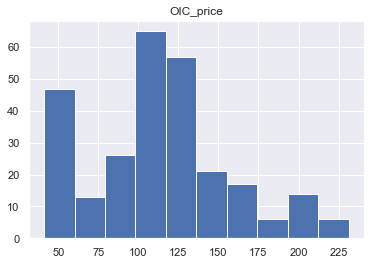

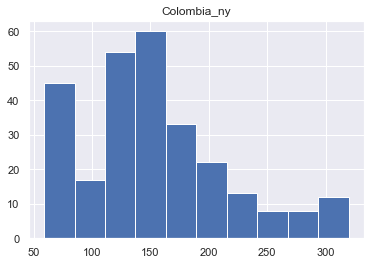

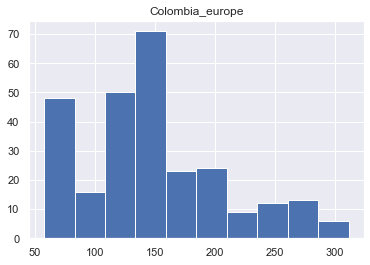

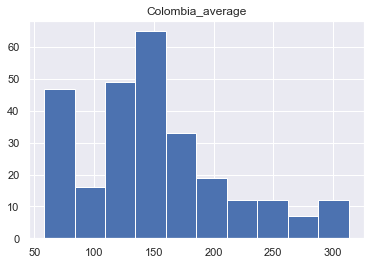

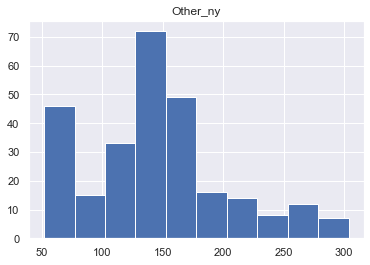

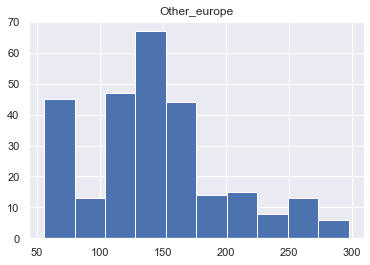

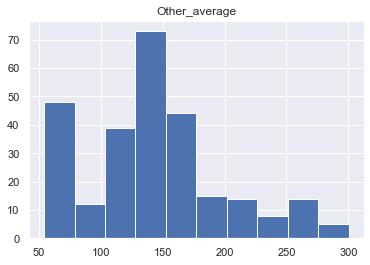

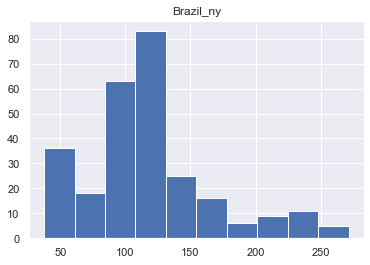

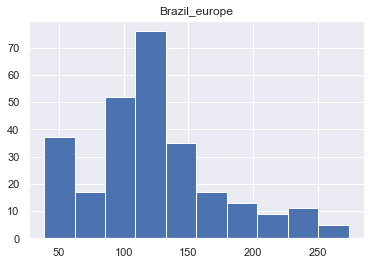

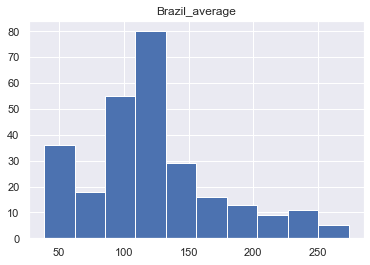

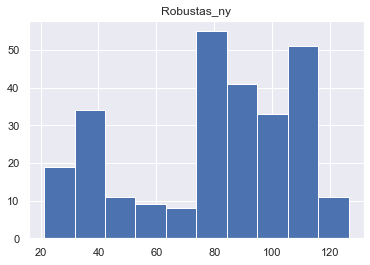

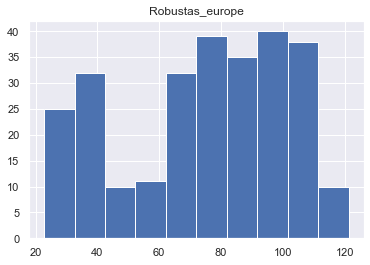

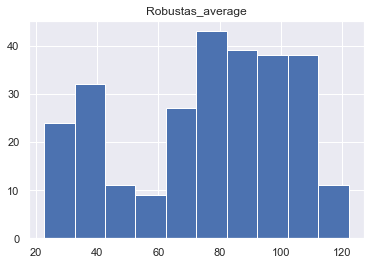

In [32]:
# create a list with th enames of the columns
lista = list(df.columns)
#  removes the first item of the list, which is 'Date'
lista.pop(0)


for each_market in lista:
    df.hist(column =each_market)

# subplot

#### Graphing all columns, as a time series, to compare all of them together

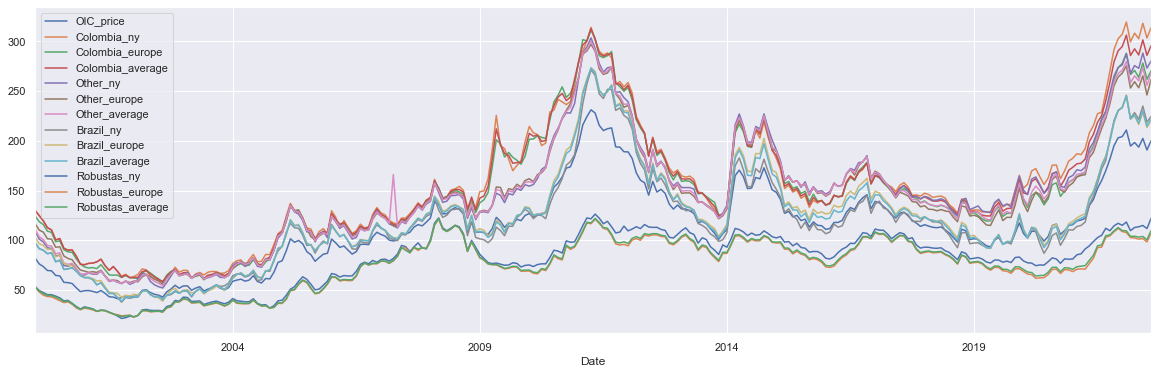

In [33]:
# create a list with th enames of the columns
lista = list(df.columns)
#  removes the first item of the list, which is 'Date'
lista.pop(0)

# selects the size of the column
plt.figure(figsize=(20,6))
# plots the axes
ax = plt.gca()

# creates a loop graphing all the columns vs 'Date'
for column in lista:
    df.plot(x ='Date', y = column, ax = ax)

#### Comparing just the averages and the OIC prices

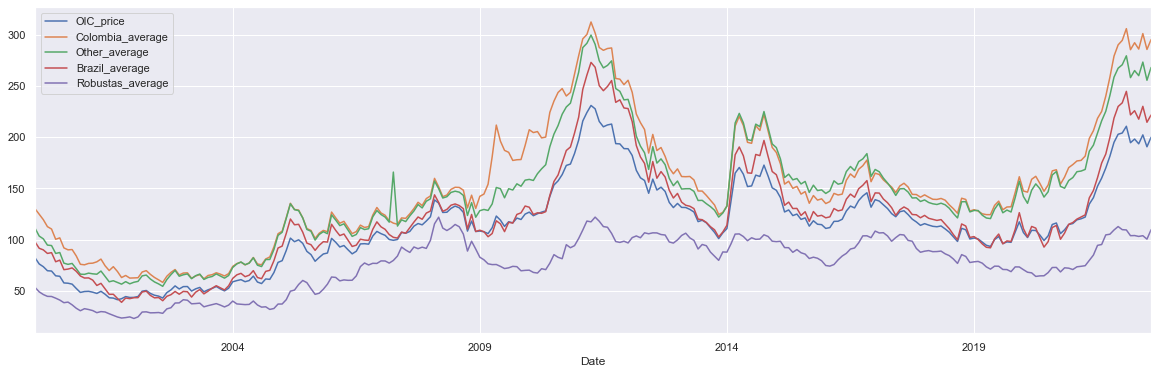

In [34]:
lista_averages = ['OIC_price', 'Colombia_average', 'Other_average', 'Brazil_average', 'Robustas_average']
# selects the size of the column
plt.figure(figsize=(20,6))
# plots the axes
ax = plt.gca()

# creates a loop graphing all the columns vs 'Date'
for column in lista_averages:
    df.plot(x ='Date', y = column, ax = ax)